1.	Load the data from the “nflstats.csv” file into a DataFrame.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.features import Rank2D
from yellowbrick.style import set_palette
from yellowbrick.features import ParallelCoordinates
import numpy as np

df = pd.read_csv('nflstats.csv')

# Reads in our data.

2.	Display the dimensions of the file.

In [2]:
print('Dimensions of file: ', df.shape)

# Prints the dimensions of the data.

Dimensions of file:  (1578, 33)


3.	Display the first 5 rows.

In [3]:
df.head()
# Head shows the first 5 rows.

,Year,League,TeamName,WonSB,W,L,T,DivPlace,DivMax,DivTotal,...,DefYardsRank,T/G,PointsRank,YardsRank,MaxTeams,MoV,SoS,SRS,OSRS,DSRS
0,2019,NFL,Arizona Cardinals,0,5,10,1,4,4,4th of 4,...,32,18,23,29,32,-5.1,1.8,-3.2,-0.3,-2.9
1,2018,NFL,Arizona Cardinals,0,3,13,0,4,4,4th of 4,...,20,29,32,32,32,-12.5,1.0,-11.5,-9.6,-1.9
2,2017,NFL,Arizona Cardinals,0,8,8,0,3,4,3rd of 4,...,6,23,24,15,32,-4.1,0.4,-3.7,-4.0,0.2
3,2016,NFL,Arizona Cardinals,0,7,8,1,2,4,2nd of 4,...,2,17,7,1,32,3.5,-1.9,1.6,2.4,-0.8
4,2015,NFL,Arizona Cardinals,0,13,3,0,1,4,1st of 4,...,5,4,2,2,32,11.0,1.3,12.3,9.0,3.4


5.	Look at summary information about your data (total, mean, min, max, freq, unique, etc.)  Does this present any more questions for you?  Does it lead you to a conclusion yet?  

In [4]:
print('Describe data:\n',df.describe())

print('Summary: \n',df.describe(include = ['O']))

# This lets us take a look at our categorical and numerical variables and their stats.

Describe data:
               Year        WonSB            W            L            T  \
count  1578.000000  1578.000000  1578.000000  1578.000000  1578.000000   
mean   1993.712928     0.033587     7.675539     7.675539     0.110266   
std      15.502264     0.180220     3.079982     3.074418     0.369075   
min    1966.000000     0.000000     0.000000     0.000000     0.000000   
25%    1980.000000     0.000000     5.000000     5.000000     0.000000   
50%    1994.500000     0.000000     8.000000     8.000000     0.000000   
75%    2007.000000     0.000000    10.000000    10.000000     0.000000   
max    2019.000000     1.000000    16.000000    16.000000     3.000000   

          DivPlace       DivMax  PlayoffsResultNumerical    PointsFor  \
count  1578.000000  1578.000000              1578.000000  1578.000000   
mean      2.731939     4.477820                 0.857414   323.847275   
std       1.304985     0.600002                 1.364213    74.217167   
min       1.000000     4.

6.	Make some histograms of your data (“A picture is worth a thousand words!”)

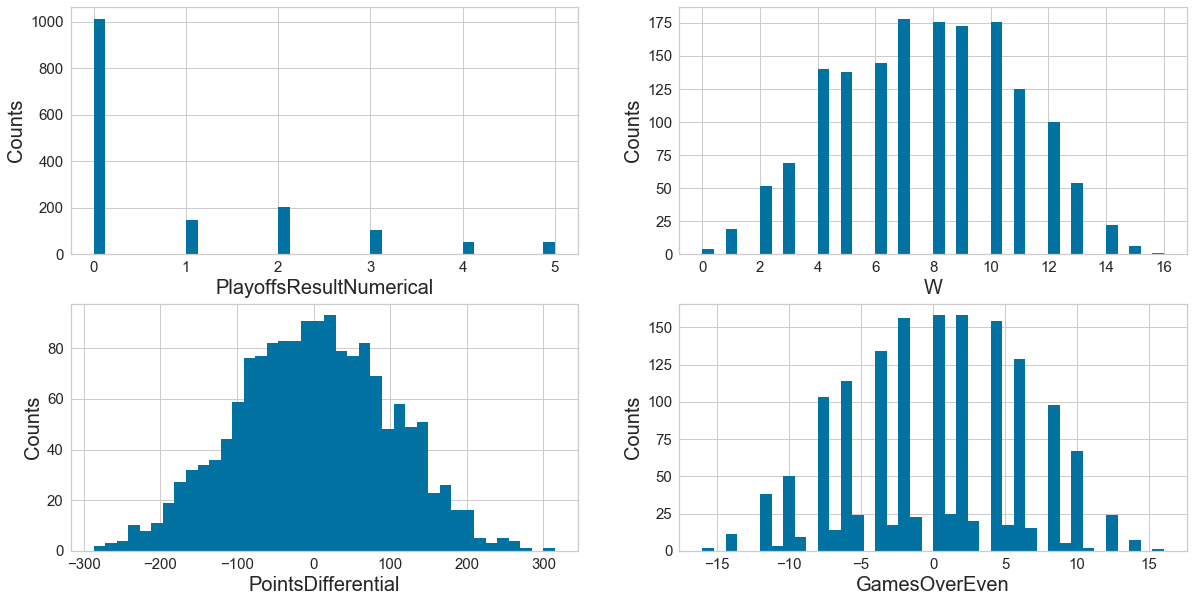

In [5]:
plt.rcParams['figure.figsize'] = (20, 10)
fig, axes = plt.subplots(nrows = 2, ncols = 2)

df['GamesOverEven'] = df['W'] - df['L']

# Creates a new column for their win differtential.

num_features = ['PlayoffsResultNumerical','W', 'PointsDifferential', 'GamesOverEven'] 
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)


7.	Make some bar charts for variables with only a few options.

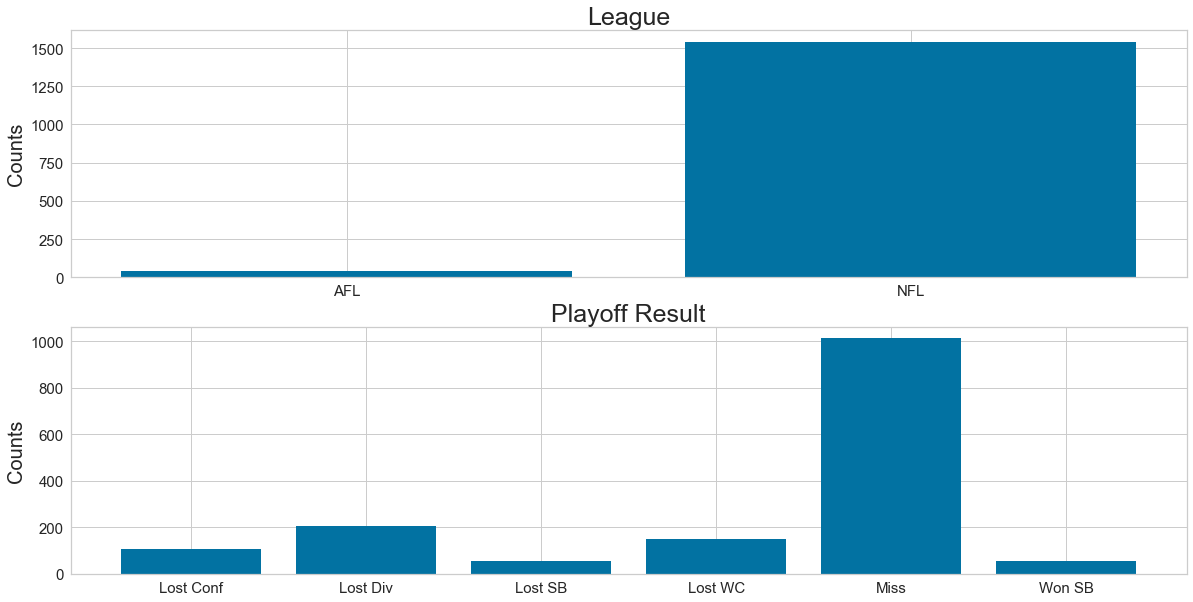

In [6]:
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 1)

# make the data read to feed into the visulizer
X_League = df.replace({'League': {1: 'NFL', 0: 'AFL'}}).groupby('League').size().reset_index(name='Counts')['League']
Y_League = df.replace({'League': {1: 'NFL', 0: 'AFL'}}).groupby('League').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[0].bar(X_League, Y_League)
axes[0].set_title('League', fontsize=25)
axes[0].set_ylabel('Counts', fontsize=20)
axes[0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Playoff = df.replace({'PlayoffsResult': {0: 'Miss', 1: 'Lost WC', 2: 'Lost Div', 3: 'Lost Conf', 4: 'Lost SB', 5: 'Won SB'}}).groupby('PlayoffsResult').size().reset_index(name='Counts')['PlayoffsResult']
Y_Playoff = df.replace({'PlayoffsResult': {0: 'Miss', 1: 'Lost WC', 2: 'Lost Div', 3: 'Lost Conf', 4: 'Lost SB', 5: 'Won SB'}}).groupby('PlayoffsResult').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[1].bar(X_Playoff, Y_Playoff)
axes[1].set_title('Playoff Result', fontsize=25)
axes[1].set_ylabel('Counts', fontsize=20)
axes[1].tick_params(axis='both', labelsize=15)



8.	To see if the data is correlated, make some Pearson Ranking charts

array([[   0,    5,  -81,   -5],
       [   0,    3, -200,  -10],
       [   0,    8,  -66,    0],
       ...,
       [   0,    5, -109,   -4],
       [   0,    5,   -6,   -1],
       [   0,    7,   -4,    0]], dtype=int64)

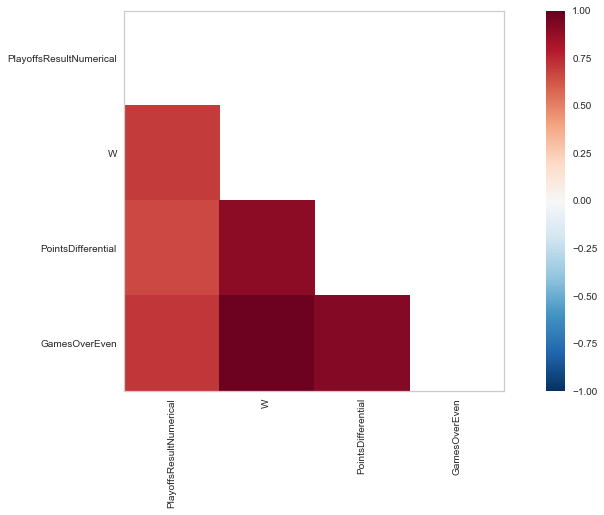

In [7]:
plt.rcParams['figure.figsize'] = (15, 7)

X = df[num_features].values

visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data


9.	Use Parallel Coordinates visualization to compare the distributions of numerical variables between team records and playoff success.

array([[-0.17148289, -0.16722117, -0.1345515 , -0.15625   ],
       [-0.17148289, -0.29222117, -0.33222591, -0.3125    ],
       [-0.17148289,  0.02027883, -0.10963455,  0.        ],
       ...,
       [-0.17148289, -0.16722117, -0.18106312, -0.125     ],
       [-0.17148289, -0.16722117, -0.00996678, -0.03125   ],
       [-0.17148289, -0.04222117, -0.00664452,  0.        ]])

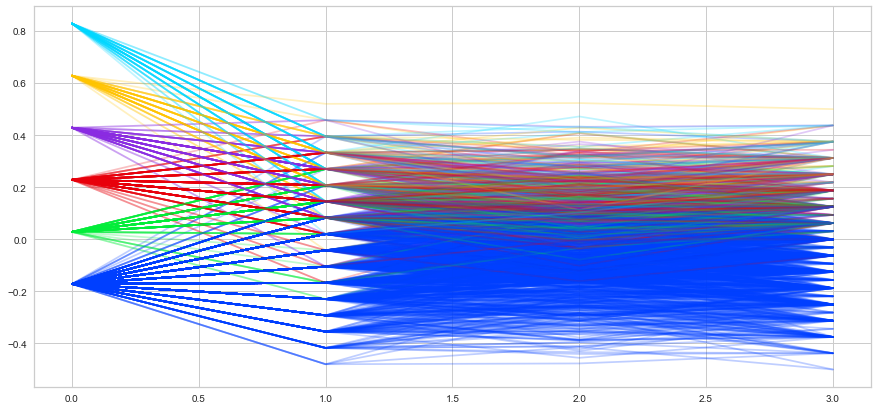

In [8]:

plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer

set_palette('sns_bright')

classes = ['Missed Playoffs', 'Lost WC', 'Lost Divisional', 'Lost Conference', 'Lost SB', 'Won SB']


# copy data to a new dataframe
df_norm = df.copy()
# normalize data to 0-1 range
for feature in num_features:
    df_norm[feature] = (df[feature] - df[feature].mean(skipna=True)) / (df[feature].max(skipna=True) - df[feature].min(skipna=True))

X = df_norm[num_features].values
y = df.PlayoffsResultNumerical.values

visualizer = ParallelCoordinates(classes=classes, features=num_features)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data


10.	Use Stack Bar Charts to compare teams who made it far in the playoffs to teams who didn’t make it based on the other variables. 


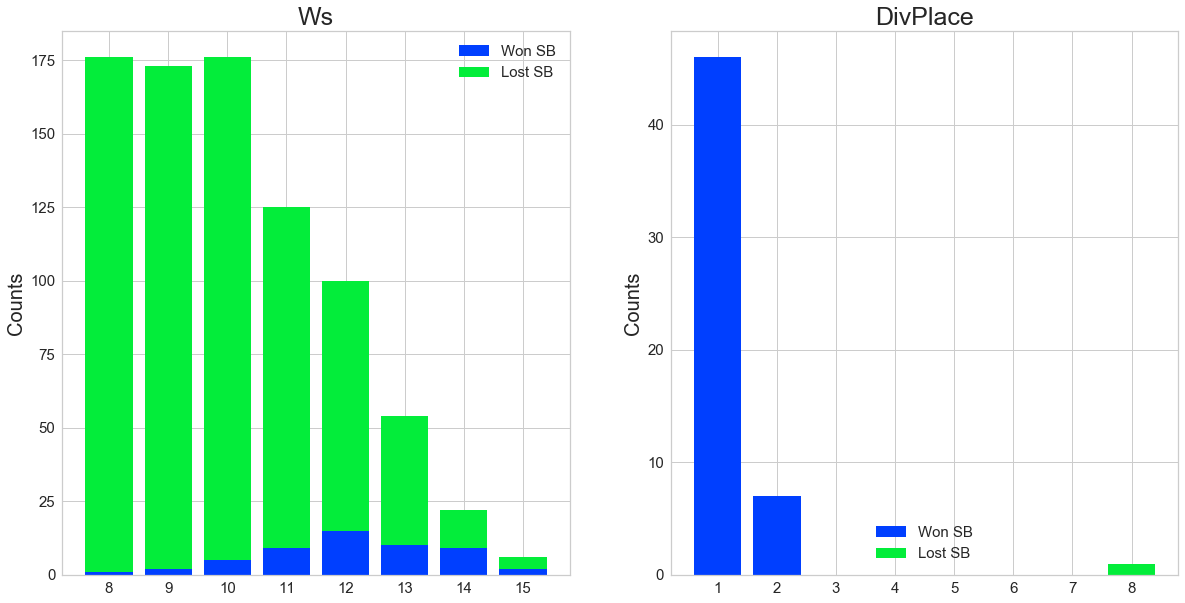

In [9]:
plt.rcParams['figure.figsize'] = (20, 10)


fig, axes = plt.subplots(nrows = 1, ncols = 2)



# make the data read to feed into the visulizer
W_MadePlayoffs = df.replace({'WonSB': {1: 'Yes', 0: 'No'}})[df['WonSB']==1]['W'].value_counts()
W_NoPlayoffs = df.replace({'WonSB': {1: 'Yes', 0: 'No'}})[df['WonSB']==0]['W'].value_counts()
W_NoPlayoffs = W_NoPlayoffs.reindex(index = W_MadePlayoffs.index)
# make the bar plot

p1 = axes[0].bar(W_MadePlayoffs.index, W_MadePlayoffs.values)
p2 = axes[0].bar(W_NoPlayoffs.index, W_NoPlayoffs.values, bottom=W_MadePlayoffs.values)
axes[0].set_title('Ws', fontsize=25)
axes[0].set_ylabel('Counts', fontsize=20)
axes[0].tick_params(axis='both', labelsize=15)
axes[0].legend((p1[0], p2[0]), ('Won SB', 'Lost SB'), fontsize = 15)


# make the data read to feed into the visulizer
DivPlace_MadePlayoffs= df.replace('WonSB')[df['WonSB']==1]['DivPlace'].value_counts()
DivPlace_NoPlayoffs = df.replace('WonSB')[df['WonSB']==0]['DivPlace'].value_counts()
DivPlace_NoPlayoffs = DivPlace_NoPlayoffs.reindex(index = W_MadePlayoffs.index)
# make the bar plot

p3 = axes[1].bar(DivPlace_MadePlayoffs.index, DivPlace_MadePlayoffs.values)
p4 = axes[1].bar(DivPlace_NoPlayoffs.index, DivPlace_NoPlayoffs.values)
axes[1].set_title('DivPlace', fontsize=25)
axes[1].set_ylabel('Counts', fontsize=20)
axes[1].tick_params(axis='both', labelsize=15)
axes[1].legend((p3[0], p4[0]), ('Won SB', 'Lost SB'), fontsize = 15)


11.	  
 - Now it’s time to reduce some of the features so we can concentrate on the things that matter!  There features we will get rid of are:  "DivTotal" (it's redundant), "Coaches", "AV", "Passer", "Rusher", "Receiver".  (Names don't really tell us performance and there are hundreds of unique values.
 - We can also fill in missing values if there were any. In this case, we don't, but it would have been something to try. Maybe we can fill in the NAs for playoff results if we hadn't already.


In [10]:
def fill_na_median(data, inplace=True):
    return data.fillna(data.median(), inplace=inplace)
# This function fills NAs with the median.

# fill with the most represented value
def fill_na_most(data, inplace=True):
    return data.fillna('S', inplace=inplace)
# This one fills it with the most representative value.



12.	If you go back and look at the histograms of MadePlayoffs, you’ll see that it is very skewed. Most teams don't make the playoffs or even make it very far.Let's try a Log Transformation: it is a good method to use on highly skewed data.  

In [11]:
# log-transformation
def log_transformation(data):
    return data.apply(np.log1p)

df['PlayoffResults_log1p'] = log_transformation(df['PlayoffsResultNumerical'])

# check the data
print(df.describe())

              Year        WonSB            W            L            T  \
count  1578.000000  1578.000000  1578.000000  1578.000000  1578.000000   
mean   1993.712928     0.033587     7.675539     7.675539     0.110266   
std      15.502264     0.180220     3.079982     3.074418     0.369075   
min    1966.000000     0.000000     0.000000     0.000000     0.000000   
25%    1980.000000     0.000000     5.000000     5.000000     0.000000   
50%    1994.500000     0.000000     8.000000     8.000000     0.000000   
75%    2007.000000     0.000000    10.000000    10.000000     0.000000   
max    2019.000000     1.000000    16.000000    16.000000     3.000000   

          DivPlace       DivMax  PlayoffsResultNumerical    PointsFor  \
count  1578.000000  1578.000000              1578.000000  1578.000000   
mean      2.731939     4.477820                 0.857414   323.847275   
std       1.304985     0.600002                 1.364213    74.217167   
min       1.000000     4.000000          

13. Convert your categorical data into numbers (TeamName, Playoffs Result)


In [17]:
#get the categorical data
cat_features = ['TeamName']
print(cat_features)
df_cat = df[cat_features]
df_cat = df_cat.replace({'TeamName': {1: 'Arizona Cardinals', 1: 'Phoenix Cardinals', 1: 'St. Louis Cardinals', 2: 'Atlanta Falcons', 	3: 'Baltimore Ravens', 	4: 'Buffalo Bills', 	5: 'Carolina Panthers', 	6: 'Chicago Bears', 	7: 'Cincinnati Bengals', 	8: 'Cleveland Browns', 	9: 'Dallas Cowboys', 	10: 'Denver Broncos', 	11: 'Detroit Lions', 	12: 'Green Bay Packers', 	13: 'Houston Texans', 	14: 'Indianapolis Colts', 	14: 'Baltimore Colts', 	15: 'Jacksonville Jaguars', 	16: 'Kansas City Chiefs', 	17: 'Los Angeles Chargers', 	17: 'San Diego Chargers', 	18: 'Los Angeles Rams', 	18: 'St. Louis Rams', 	19: 'Miami Dolphins', 	20: 'Minnesota Vikings', 	21: 'New England Patriots', 	21: 'Boston Patriots', 	22: 'New Orleans Saints', 	23: 'New York Giants', 	24: 'New York Jets', 	25: 'Oakland Raiders', 	25: 'Los Angeles Raiders', 	26: 'Philadelphia Eagles', 	27: 'Pittsburgh Steelers', 	28: 'San Francisco 49ers', 	29: 'Seattle Seahawks', 	30: 'Tampa Bay Buccaneers', 	31: 'Tennessee Titans', 	31: 'Tennessee Oilers', 	31: 'Houston Oilers', 	32: 'Washington Redskins'}})
# One Hot Encoding 
df_cat_dummies = pd.get_dummies(df_cat)
# check the data
print(df_cat_dummies)

['TeamName']
      TeamName_Arizona Cardinals  TeamName_Atlanta Falcons  \
0                              1                         0   
1                              1                         0   
2                              1                         0   
3                              1                         0   
4                              1                         0   
5                              1                         0   
6                              1                         0   
7                              1                         0   
8                              1                         0   
9                              1                         0   
10                             1                         0   
11                             1                         0   
12                             1                         0   
13                             1                         0   
14                             1                         

14.	Training - Split your data into two sets:  Training and Testing.  

In [18]:
# here we will combine the numerical features and the dummie features together
features_model = ['W', 'PointsDifferential']
df_model_X = pd.concat([df[features_model], df_cat_dummies], axis=1)

# create a whole target dataset that can be used for train and validation data splitting
df_model_y = df.replace({'WonSB': {0: 'No', 1: 'Yes'}})['WonSB']
# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(df_model_X, df_model_y, test_size =0.3, random_state=15)

In [19]:
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Playoff results.
print('\n')
print('Playoff results in the training set:')
print(y_train.value_counts())

print('\n')
print('Playoff results in the validation set:')
print(y_val.value_counts())

No. of samples in training set:  1104
No. of samples in validation set: 474


Playoff results in the training set:
No     1067
Yes      37
Name: WonSB, dtype: int64


Playoff results in the validation set:
No     458
Yes     16
Name: WonSB, dtype: int64


Evaluation – We are trying to predict if a team will win the Super Bowl. We will start with linear regression.

Metrics for the evaluation:
 - Confusion Matrix (you should get 84% - pretty good) (84.3% yeah, pretty good)
 - Precision, Recall & F1 score (all 3 were very good) (I can see that)
 - ROC curve (the dotted line is the randomly guessed so anything above that is good metric) (Way above that line.)

In [20]:
print(X_train)

       W  PointsDifferential  TeamName_Arizona Cardinals  \
405    6                  81                           0   
1258  10                 147                           0   
1567  10                  74                           0   
412   10                  82                           0   
147    9                 111                           0   
723    2                -124                           0   
669    8                  97                           0   
1344   7                  47                           0   
274    4                 -73                           0   
884   11                 118                           0   
1466  10                  36                           0   
1129   9                  23                           0   
1165   6                  10                           0   
32     7                  -6                           0   
827    6                 -48                           0   
336    3                -258            

C:\Users\Kyle Morris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


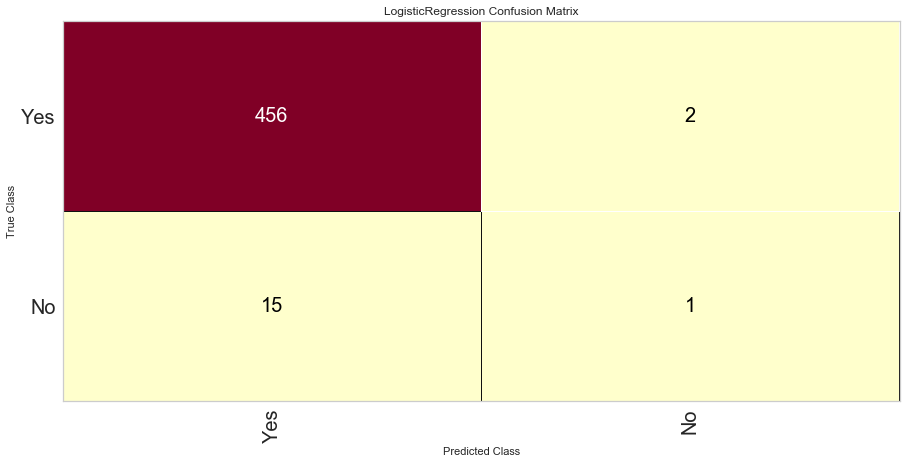

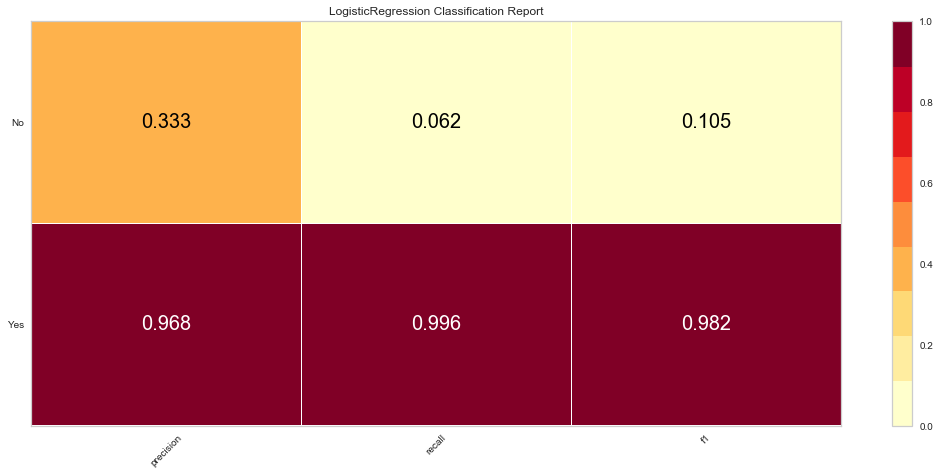

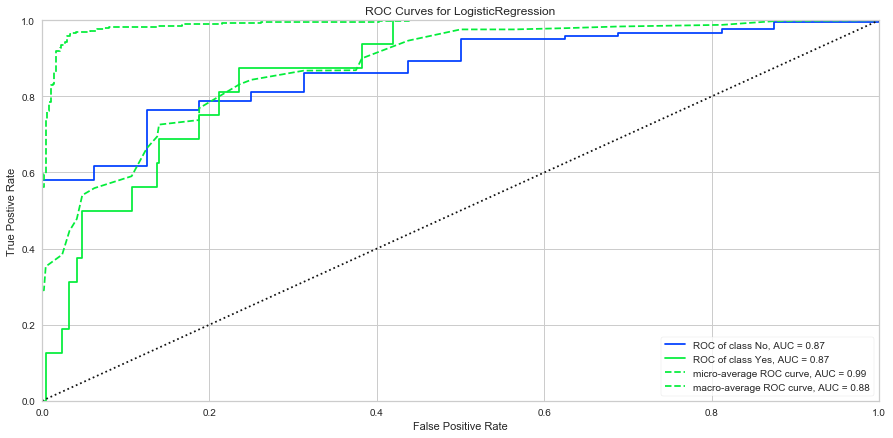

In [21]:
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
model = LogisticRegression()

#The ConfusionMatrix visualizer taxes a model
classes = ['Yes', 'No']
cm = ConfusionMatrix(model, classes=classes, percent=False)


#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()